In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
from matplotlib import rc
from PIL import Image
import seaborn as sns; 
from mpl_toolkits.mplot3d import Axes3D


Bad key "lines.markeredgecolor" on line 81 in
/home/pedrolarben/.config/matplotlib/stylelib/gadfly.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
_METRICS_FILE = './files/benchmark_sensitivityAnalysis'
_METRIC = 'kappa'
_METRIC1 = 'total_time'
_CLASSIFIER = 'keras_parallel_3_Dilated_Conv'

datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
datasets_to_remove += ['breast', 'carnorm', 'covtype', 'electricity', 'higgs200k', 'kddcup99norm', 'ozone', 'pendigitis', 'pokerhand', 'spambase', 'susy100k']
classifiers_to_remove = ['keras_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv', 'MOA_SGD', 'MOA_WeightedMajorityAlgorithm', 'MOA_Perceptron']

In [3]:
#read data
metrics = pd.read_csv(_METRICS_FILE+'.csv')

# Delete datasets and classifier that we dont want
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]
metrics = metrics[metrics['instances']>1000]

metrics = metrics[metrics.classifier.isin([ clf for clf in metrics.classifier if 'pooling_' in clf ])]
metrics['classifier'] = [clf.split('_')[-1] for clf in metrics['classifier']]

print(len(metrics.dataset.unique()), "datasets")
metrics.sample(10)

29 datasets


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time
8300,UWaveGestureLibraryY,10x5,4473,315,8,0.701485,0.637502,0.024579,0.005140,0.029720,21.998380,4.600691,21.998380
7409,SwedishLeaf,120x30,1095,128,15,0.875639,0.855949,0.054274,0.041163,0.095437,2.008144,1.523037,2.008144
8375,UWaveGestureLibraryY,60x20,4458,315,8,0.773498,0.721116,0.039473,0.018880,0.058353,8.802572,4.210213,8.802572
8502,UWaveGestureLibraryZ,40x70,4408,315,8,0.763283,0.708737,0.110128,0.067802,0.177930,6.938092,4.271519,6.938092
5605,NonInvasiveFetalECGThorax1,100x60,3705,750,42,0.914903,0.904939,0.119471,0.063635,0.183106,7.407201,3.945349,7.407201
1476,ECG5000,10x70,4930,140,5,0.941442,0.885119,0.101043,0.059913,0.160957,7.174084,4.253834,7.174084
8162,UWaveGestureLibraryX,110x120,4358,315,8,0.824229,0.783853,0.187991,0.110787,0.298779,6.955670,4.099135,6.955670
577,CinCECGtorso,60x30,1390,1639,4,0.993539,0.990273,0.066776,0.049787,0.116563,3.138455,2.339990,3.138455
2668,FordA,100x120,4801,500,2,0.933947,0.854403,0.202102,0.120097,0.322198,8.286174,4.923965,8.286174
8957,Yoga,60x70,3230,426,2,0.942488,0.872361,0.118369,0.071203,0.189572,5.563358,3.346538,5.563358


In [4]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
metrics_table = metrics_table.sort_values(by=list(metrics_table.columns), ascending=False)
metrics_table = metrics_table[metrics_table.columns[0:]]
metrics_table.columns = [ c.split('x')[0]+"x"+c.split('x')[1] for c in metrics_table.columns]
#metrics_table[[(num_batch_fed,bs) for num_batch_fed,batch_size in metrics_table.columns if bs=='10'  ]]

metrics_table = pd.DataFrame(metrics_table.mean())
metrics_table.columns = [_METRIC]
metrics_table['num batches fed'] = [int(c.split('x')[0]) for c in metrics_table.index]
metrics_table['batch size'] = [int(c.split('x')[1]) for c in metrics_table.index]
metrics_table = metrics_table.pivot(index='num batches fed', columns='batch size', values=_METRIC) 
metrics_table


batch size,5,10,20,30,40,50,60,70,80,90,100,110,120
num batches fed,,,,,,,,,,,,,
5,0.698658,0.714441,0.775281,0.789789,0.800033,0.806529,0.811281,0.816276,0.819870,0.816620,0.821155,0.823429,0.819080
10,0.700021,0.762140,0.789520,0.803940,0.809530,0.813597,0.812353,0.821388,0.821792,0.819371,0.823574,0.822749,0.825881
20,0.705177,0.761556,0.798683,0.801753,0.815652,0.819146,0.824654,0.820447,0.823447,0.820506,0.823708,0.826484,0.825617
40,0.732337,0.773159,0.801321,0.806738,0.817607,0.818170,0.823843,0.823924,0.826340,0.824690,0.825293,0.822221,0.825634
60,0.714617,0.775337,0.797810,0.807073,0.814972,0.818208,0.825579,0.822856,0.819415,0.828197,0.822627,0.823274,0.824288
80,0.689795,0.779627,0.802991,0.811563,0.817126,0.817644,0.820206,0.824947,0.823561,0.822385,0.824566,0.824236,0.824454
100,0.707903,0.776565,0.797775,0.807820,0.815137,0.820221,0.823195,0.822035,0.825290,0.825609,0.820965,0.827280,0.821241
110,0.704767,0.773522,0.795168,0.808349,0.814614,0.817313,0.820891,0.824027,0.821219,0.823046,0.820940,0.824390,0.824363
120,0.732849,0.772672,0.794476,0.807698,0.815916,0.819470,0.823339,0.824036,0.822693,0.826683,0.825709,0.826009,0.825170


In [5]:
metrics_table1 = metrics.pivot(index='dataset',columns='classifier')[_METRIC1]
metrics_table1 = metrics_table1.dropna()
metrics_table1 = metrics_table1.reindex(metrics_table1.mean().sort_values(ascending=False).index, axis=1)
metrics_table1 = metrics_table1.sort_values(by=list(metrics_table1.columns), ascending=False)
metrics_table1 = metrics_table1[metrics_table1.columns[0:]]
metrics_table1.columns = [ c.split('x')[0]+"x"+c.split('x')[1] for c in metrics_table1.columns]
#metrics_table[[(num_batch_fed,bs) for num_batch_fed,batch_size in metrics_table.columns if bs=='10'  ]]

metrics_table1 = pd.DataFrame(metrics_table1.mean())
metrics_table1.columns = [_METRIC]
metrics_table1['num batches fed'] = [int(c.split('x')[0]) for c in metrics_table1.index]
metrics_table1['batch size'] = [int(c.split('x')[1]) for c in metrics_table1.index]
metrics_table1 = metrics_table1.pivot(index='num batches fed', columns='batch size', values=_METRIC) 
metrics_table1


batch size,5,10,20,30,40,50,60,70,80,90,100,110,120
num batches fed,,,,,,,,,,,,,
5,22.451536,14.269463,10.777288,9.156935,8.427187,7.923417,7.551344,7.367924,7.170858,6.905332,6.835965,6.721949,6.669656
10,17.340566,11.737864,8.636439,7.807352,7.253741,6.961190,6.679574,6.588524,6.384167,6.314519,6.305630,6.177920,6.221211
20,15.557513,10.671365,8.114909,7.273230,6.863910,6.529031,6.393111,6.359707,6.343325,6.104313,6.070582,6.114899,6.066327
40,15.005660,10.275938,7.849174,7.126569,6.779522,6.532556,6.385601,6.249165,6.175918,6.059635,6.138960,6.103692,6.007619
60,14.602005,10.163311,7.897564,7.132804,6.757199,6.520445,6.402640,6.373480,6.205848,6.174179,6.095267,6.101904,6.031355
80,14.468719,10.076821,7.769542,7.204572,6.733163,6.556130,6.372478,6.363058,6.288590,6.162153,6.082349,6.059893,5.990213
100,14.529699,9.984140,7.905446,7.103062,6.776880,6.527006,6.436945,6.294669,6.200345,6.198559,6.087145,6.067089,6.052438
110,14.288313,10.100500,7.895855,7.139425,6.792994,6.533801,6.487302,6.280783,6.217039,6.156232,6.100261,6.134967,5.993785
120,14.282059,9.989440,7.815403,7.076555,6.753017,6.599732,6.434495,6.293866,6.230816,6.218194,6.098202,6.087590,6.036231


In [6]:
metrics_to_plot = pd.melt(metrics_table)
metrics_to_plot['num batches fed'] = list(metrics_table.index)*len(metrics_table.columns)
metrics_to_plot

,batch size,value,num batches fed
0,5,0.698658,5
1,5,0.700021,10
2,5,0.705177,20
3,5,0.732337,40
4,5,0.714617,60
5,5,0.689795,80
6,5,0.707903,100
7,5,0.704767,110
8,5,0.732849,120
9,10,0.714441,5


In [7]:
metrics_to_plot1 = pd.melt(metrics_table1)
metrics_to_plot1['num batches fed'] = list(metrics_table1.index)*len(metrics_table1.columns)
metrics_to_plot1

,batch size,value,num batches fed
0,5,22.451536,5
1,5,17.340566,10
2,5,15.557513,20
3,5,15.005660,40
4,5,14.602005,60
5,5,14.468719,80
6,5,14.529699,100
7,5,14.288313,110
8,5,14.282059,120
9,10,14.269463,5


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

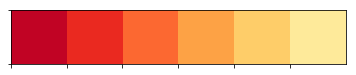

In [8]:
metrics_to_plot[(metrics_to_plot['batch size'] == 90) & (metrics_to_plot['num batches fed'] == 60)].value
#(z==z[85]).any()
current_palette = sns.color_palette('YlOrRd_r')
sns.palplot(current_palette)
sns.color_palette()

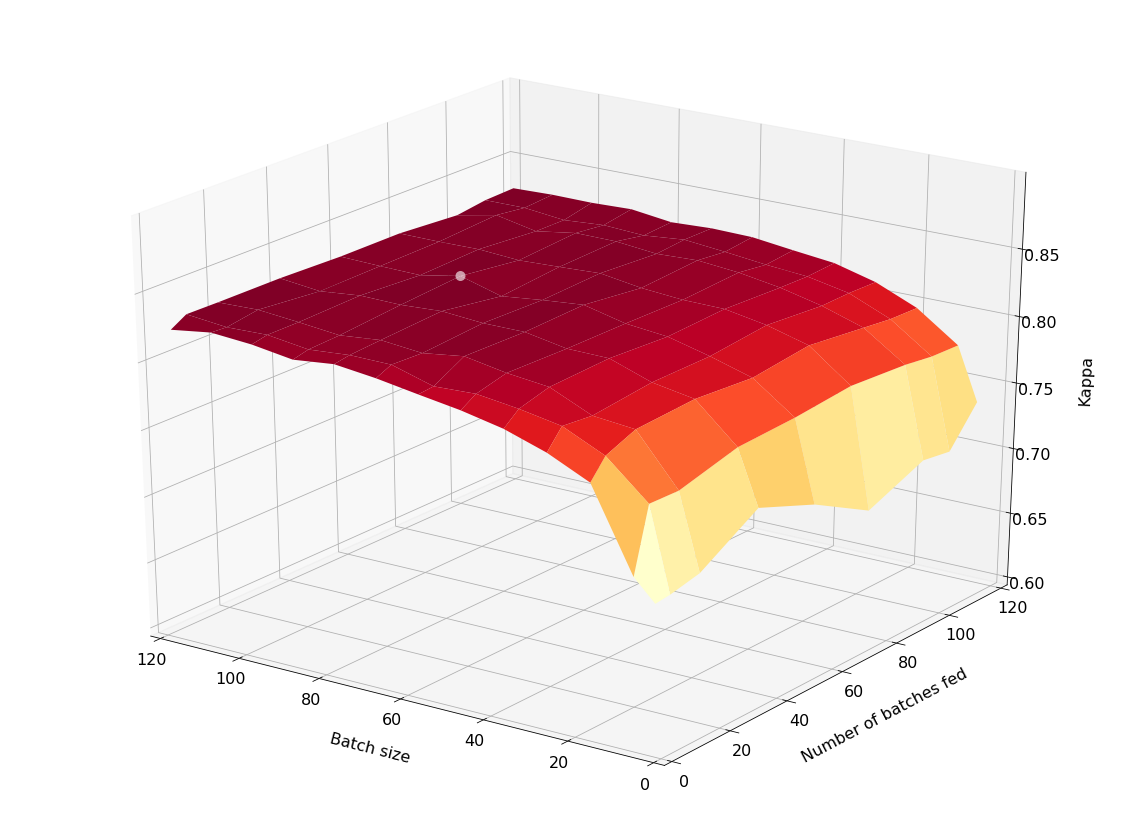

In [9]:
pal = {True:(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), False:(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}
plt.rcParams.update({'font.size': 16})

#plt.rcParams['figure.figsize'] = (20,20)
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(25, 125)

y,x, z = metrics_to_plot['num batches fed'],metrics_to_plot['batch size'], metrics_to_plot['value']

Y, X = list(metrics_table.index), list(metrics_table.columns)
X, Y = np.meshgrid(X, Y)
Z = metrics_table.values

ax.plot_surface(X, Y, Z, cmap='YlOrRd', linewidth=0.1)
ax.scatter(x, y, z, c= [(1,1,1,1) if i else (0,0,0,0) for i in (z==z[85])], linewidth=0, s=100);

ax.set_xlabel('Batch size', labelpad=20)
ax.set_ylabel('Number of batches fed', labelpad=20)
ax.set_zlabel("Kappa", labelpad=20)

ax.set_xlim((0,120))
ax.set_ylim((120,0))
#ax.set_zlim((0,30))
ax.set_zlim((0.6,0.9))

plt.savefig('files/SensitivityAnalysisKappa.eps',format='eps', bbox_inches='tight')
plt.show()

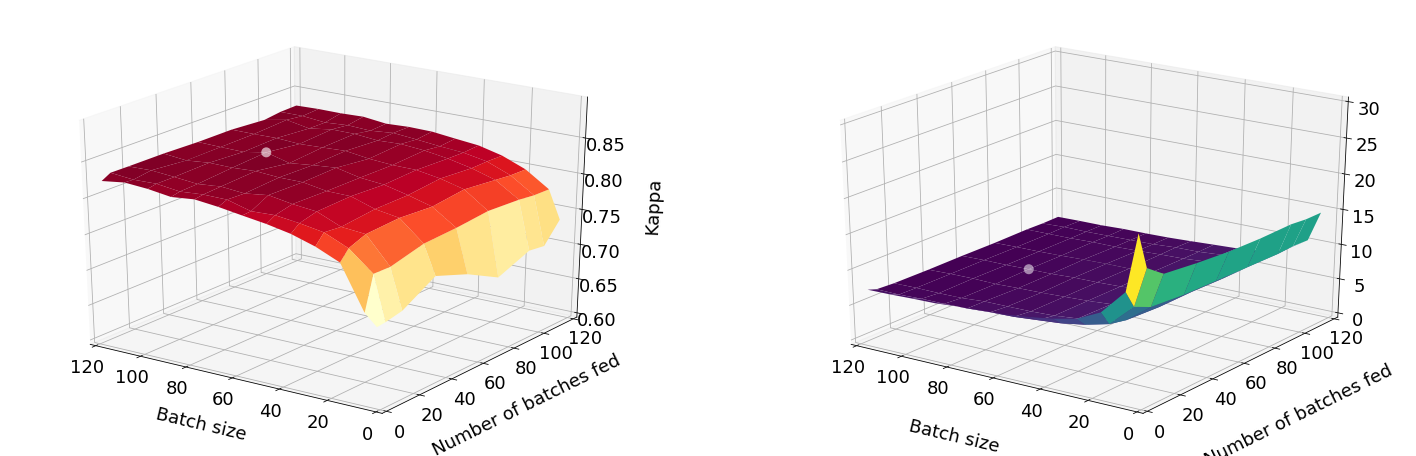

In [10]:
pal = {True:(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), False:(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}
plt.rcParams.update({'font.size': 18})

#plt.rcParams['figure.figsize'] = (20,20)
#fig, (ax, ax1) = plt.subplots(2, 2, projection='3d', sharex=True, sharey=True, figsize=(20,15))
#ax,ax1 = fig.add_subplot(122,projection='3d')
fig = plt.figure(figsize=(25,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.view_init(25, 125)

y,x, z = metrics_to_plot['num batches fed'],metrics_to_plot['batch size'], metrics_to_plot['value']

Y, X = list(metrics_table.index), list(metrics_table.columns)
X, Y = np.meshgrid(X, Y)
Z = metrics_table.values

ax.plot_surface(X, Y, Z, cmap='YlOrRd', linewidth=0.1)
ax.scatter(x, y, z, c= [(1,1,1,1) if i else (0,0,0,0) for i in (z==z[85])], linewidth=0, s=100);

ax.set_xlabel('Batch size', labelpad=20)
ax.set_ylabel('Number of batches fed', labelpad=20)
ax.set_zlabel("Kappa", labelpad=20)

ax.set_xlim((0,120))
ax.set_ylim((120,0))
ax.set_zlim((0.6,0.9))

#ax1 = fig.add_subplot(122,projection='3d')
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.view_init(25, 125)

y,x, z = metrics_to_plot1['num batches fed'],metrics_to_plot1['batch size'], metrics_to_plot1['value']

Y, X = list(metrics_table1.index), list(metrics_table1.columns)
X, Y = np.meshgrid(X, Y)
Z = metrics_table1.values

ax1.plot_surface(X, Y, Z, cmap='viridis', linewidth=0.1)
ax1.scatter(x, y, z, c= [(1,1,1,1) if i else (0,0,0,0) for i in (z==z[85])], linewidth=0, s=100);

ax1.set_xlabel('Batch size', labelpad=30)
ax1.set_ylabel('Number of batches fed', labelpad=30)
ax1.set_zlabel("Time (s)", labelpad=30)

ax1.set_xlim((0,120))
ax1.set_ylim((120,0))
ax1.set_zlim((0,30))
#ax.set_zlim((0.6,0.9))


plt.savefig('files/SensitivityAnalysis.eps',format='eps', bbox_inches='tight')
plt.show()

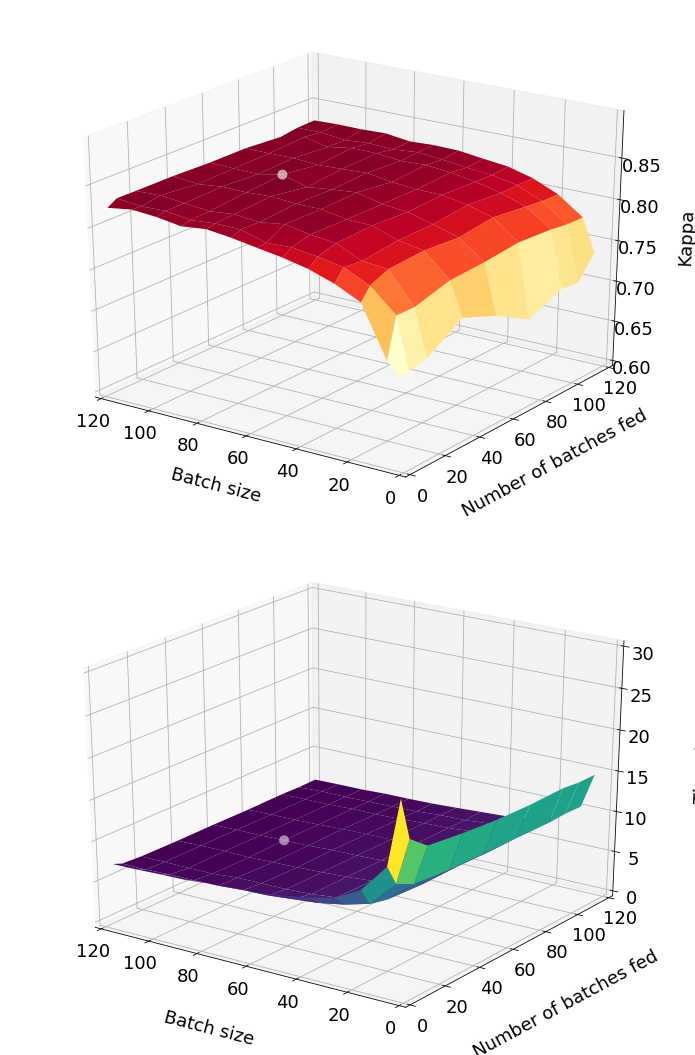

In [30]:
pal = {True:(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), False:(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}
plt.rcParams.update({'font.size': 18})

#plt.rcParams['figure.figsize'] = (20,20)
#fig, (ax, ax1) = plt.subplots(2, 2, projection='3d', sharex=True, sharey=True, figsize=(20,15))
#ax,ax1 = fig.add_subplot(122,projection='3d')
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(2, 1, 1, projection='3d')

ax.view_init(25, 125)

y,x, z = metrics_to_plot['num batches fed'],metrics_to_plot['batch size'], metrics_to_plot['value']

Y, X = list(metrics_table.index), list(metrics_table.columns)
X, Y = np.meshgrid(X, Y)
Z = metrics_table.values

ax.plot_surface(X, Y, Z, cmap='YlOrRd', linewidth=0.1)
ax.scatter(x, y, z, c= [(1,1,1,1) if i else (0,0,0,0) for i in (z==z[85])], linewidth=0, s=100);

ax.set_xlabel('Batch size', labelpad=20)
ax.set_ylabel('Number of batches fed', labelpad=20)
ax.set_zlabel("Kappa", labelpad=20)

ax.set_xlim((0,120))
ax.set_ylim((120,0))
ax.set_zlim((0.6,0.9))

#ax1 = fig.add_subplot(122,projection='3d')
ax1 = fig.add_subplot(2, 1, 2, projection='3d')
ax1.view_init(25, 125)

y,x, z = metrics_to_plot1['num batches fed'],metrics_to_plot1['batch size'], metrics_to_plot1['value']

Y, X = list(metrics_table1.index), list(metrics_table1.columns)
X, Y = np.meshgrid(X, Y)
Z = metrics_table1.values

ax1.plot_surface(X, Y, Z, cmap='viridis', linewidth=0.1)
ax1.scatter(x, y, z, c= [(1,1,1,1) if i else (0,0,0,0) for i in (z==z[85])], linewidth=0, s=100);

ax1.set_xlabel('Batch size', labelpad=30)
ax1.set_ylabel('Number of batches fed', labelpad=30)
ax1.set_zlabel("Time (s)", labelpad=30)

ax1.set_xlim((0,120))
ax1.set_ylim((120,0))
ax1.set_zlim((0,30))

#ax.set_zlim((0.6,0.9))
plt.tight_layout()

plt.savefig('files/SensitivityAnalysis-v.eps',format='eps', bbox_inches='tight')
plt.show()

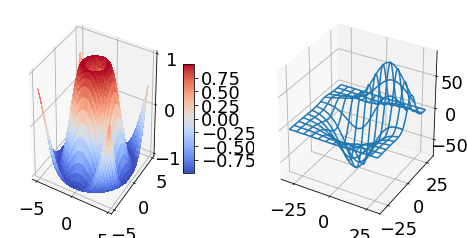

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()


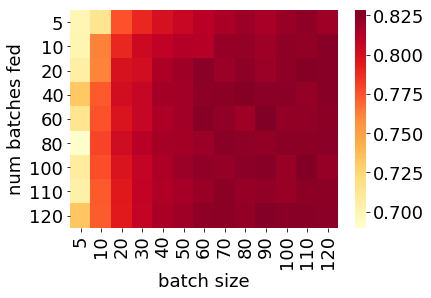

In [13]:
sns.heatmap(metrics_table, cmap="YlOrRd")

In [14]:
metrics_table.to_csv('files/SensitiveAnalysisTable.csv')